In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("salary_data.csv")
df.head()

,age,years_experience,salary,salary_range
0,32,5.0,90000,low
1,28,3.0,65000,low
2,45,15.0,150000,high
3,36,7.0,60000,low
4,52,20.0,200000,high


In [3]:
sample_df = df[['years_experience', 'salary_range']]
X = sample_df[['years_experience']]
y = sample_df['salary_range']
sample_df.head()

,years_experience,salary_range
0,5.0,low
1,3.0,low
2,15.0,high
3,7.0,low
4,20.0,high


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

279
94
279
94


In [5]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)
logisticReg.score(X_test, y_test)

0.9148936170212766

In [6]:
y_pred = logisticReg.predict(X_test)
test_df = pd.DataFrame({'y_real': y_test, 'y_pred': y_pred})
test_df.head()

,y_real,y_pred
45,low,low
272,low,low
54,low,low
236,high,high
253,low,low


In [7]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[29  4]
 [ 4 57]]


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [10]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9148936170212766
Precision: 0.9148936170212766
Recall: 0.9148936170212766
F1 Score: 0.9148936170212766


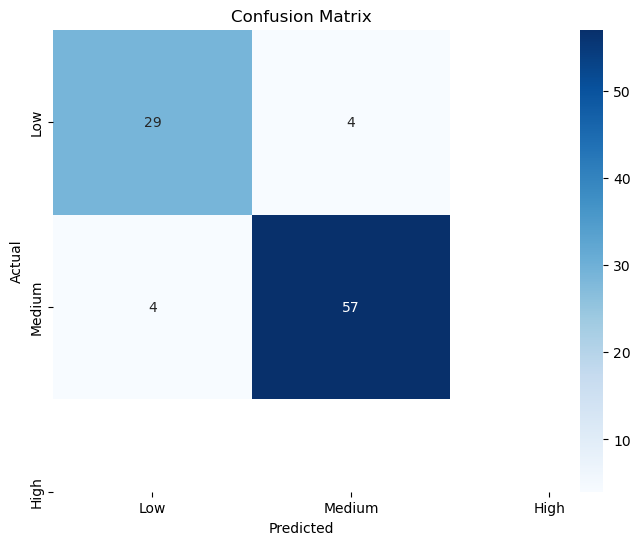

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()